<a href="https://colab.research.google.com/github/macaluzate/Ardila-Canavera-Martin/blob/main/Tarea_2_An%C3%A1lisis_Num%C3%A9rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **😀PORTADA😀**

<center>
  

## **📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️**

## **Mètodo de Mìnimos Cuadrados**

## **Asignatura**

  Anàlisis Numèrico

## **Profesor**
  Manuela Bastidas Olivares

## **Estudiantes**
 Maria Paula Ardila Otero

 Mateo Cañavera Aluma

 David Esteban Martin Acosta


## **Universidad Nacional de Colombia**
## **Sede Medellín**
## **2024 - 2**

## **📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️➖➗🟰📚📙✏️🖋️✒️📝📉📈➕✖️**


</center>

# **🧠Teoría de los Mínimos Cuadrados🧠**

<div align="justify">

**🎗️Subespacios🎗️**

Trabajamos sobre el espacio vectorial $V = \mathbb{R}^n $. Comenzamos con el concepto de subespacio lineal.

**DEFINICIÓN (Subespacio lineal)** Un subespacio lineal de $\mathbb{R}^n$ es un subconjunto $ U \subseteq \mathbb{R}^n$ que está cerrado bajo la suma de vectores y la multiplicación por escalares. Es decir, para todo $u_1, u_2 \in U $ y $\alpha \in \mathbb{R}$, se cumple que:

$$u_1 + u_2 \in U \quad \text{y} \quad \alpha u_1 \in U.$$

Se sigue de esta condición que \$ 0 \in U$.

Alternativamente, podemos verificar estas condiciones demostrando que:

- (1) $ 0 \in U$
- (2) $u_1, u_2 \in U$

$\alpha \in \mathbb{R}$ implican que $\alpha u_1 + u_2 \in U$. De hecho, al tomar $\alpha = 1$ se cumple la primera condición anterior, mientras que al elegir $u_2 = 0$ se obtiene la segunda.


**Ejemplo**: El plano $P$ formado por todos los puntos $(x, y, z) \in \mathbb{R}^3$ que satisfacen $z = x + y$ es un subespacio lineal. De hecho, $0 = 0 + 0$ por lo que $(0, 0, 0) \in P$. Y, para cualquier $u_1 = (x_1, y_1, z_1)$y $u_2 = (x_2, y_2, z_2)$ tales que $z_1 = x_1 + y_1$ y $z_2 = x_2 + y_2$ y para cualquier $\alpha \in \mathbb{R}$, tenemos que:

$$
\alpha z_1 + z_2 = \alpha(x_1 + y_1) + (x_2 + y_2) = (\alpha x_1 + x_2) + (\alpha y_1 + y_2).
$$

Es decir, $\alpha u_1 + u_2$ satisface la condición que define a $P$ y por lo tanto, está en $P$. Nota también que $P$ pasa por el origen.

En este ejemplo, el subespacio lineal $P$ puede describirse alternativamente como la colección de cada vector de la forma $(x, y, x + y)$.


</div>

**📦IMPORTACIONES📦**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import ConnectionPatch
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy import stats

**👩‍💻 IMPLEMENTACIÓN 🧑‍💻**

In [ ]:
x = np.linspace(0,1,num=101)
y = np.linspace(0,1,num=101)

In [ ]:
X, Y = np.meshgrid(x, y)

In [ ]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
Z = X + Y

In [ ]:
Z

array([[0.  , 0.01, 0.02, ..., 0.98, 0.99, 1.  ],
       [0.01, 0.02, 0.03, ..., 0.99, 1.  , 1.01],
       [0.02, 0.03, 0.04, ..., 1.  , 1.01, 1.02],
       ...,
       [0.98, 0.99, 1.  , ..., 1.96, 1.97, 1.98],
       [0.99, 1.  , 1.01, ..., 1.97, 1.98, 1.99],
       [1.  , 1.01, 1.02, ..., 1.98, 1.99, 2.  ]])

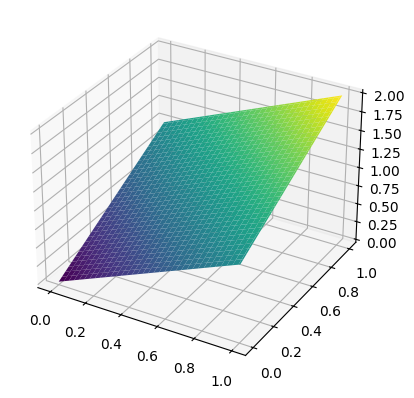

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

# **🧣Aplicaciones reales🪭**

<div align="justify">

**Verificación de Firmas mediante Redes Siamesas y Mínimos Cuadrados**

La verificación de firmas manuscritas constituye un reto de gran importancia en el ámbito de la biometría y la seguridad documental, dado que se trata de un método de validación ampliamente utilizado para la autenticación de individuos en una variedad de contextos. En un mundo altamente interconectado y digitalizado, las transacciones financieras, los acuerdos legales, y los contratos de diversa índole dependen en gran medida de la autenticación de la identidad de las personas a través de firmas manuscritas. Esta dependencia ha generado una creciente necesidad de sistemas automáticos, precisos y confiables que puedan verificar la autenticidad de las firmas de forma eficiente y con altos estándares de seguridad.

Los sistemas actuales deben ser capaces de detectar, comparar y verificar firmas de manera que se garantice la integridad de los documentos y se eviten fraudes o falsificaciones. En este sentido, la verificación de firmas no solo implica la comparación de la firma en cuestión con una base de datos de firmas registradas, sino que también debe tomar en cuenta diversos factores, como la variabilidad natural de la escritura manuscrita, los posibles intentos de falsificación, y los cambios que pueden ocurrir en la forma de firmar con el tiempo debido a factores físicos o emocionales del firmante.

Para abordar este desafío, una de las tecnologías más prometedoras es el uso de redes neuronales siamésas, una arquitectura de aprendizaje profundo que permite comparar dos imágenes de manera eficaz. Este enfoque puede aprender a identificar las similitudes y diferencias entre firmas mediante el entrenamiento en grandes volúmenes de datos de firmas reales y falsas, mejorando continuamente su capacidad de verificación. Además, el uso de métodos como los Mínimos Cuadrados, una técnica estadística utilizada para resolver problemas de optimización, puede ser de gran utilidad para ajustar modelos de verificación y mejorar su precisión.

La verificación de firmas mediante redes siamésas y métodos de optimización numérica representa una intersección única entre el procesamiento de imágenes, el aprendizaje profundo y el análisis numérico. El procesamiento de imágenes permite extraer características relevantes de las firmas, como la forma, la presión, la velocidad de la escritura y la inclinación de las letras, mientras que el aprendizaje profundo facilita la modelización de las relaciones complejas entre estos datos para realizar una clasificación precisa. Por su parte, los Mínimos Cuadrados y otras técnicas de análisis numérico proporcionan herramientas eficaces para optimizar el rendimiento de los modelos y minimizar el error en la predicción de la autenticidad.

Este enfoque multidisciplinario no solo tiene el potencial de mejorar significativamente los sistemas de verificación de firmas, sino que también abre nuevas oportunidades para la investigación en áreas como la detección de fraudes y la seguridad digital, proporcionando soluciones innovadoras y de alta confiabilidad en un mundo cada vez más dependiente de la autenticación electrónica.


**Importancia y Aplicaciones**

La verificación automática de firmas tiene múltiples aplicaciones críticas:

- **Sistemas bancarios**: validación de cheques y documentos financieros
- **Documentos legales**: verificación de contratos y documentos oficiales
- **Sistemas de seguridad**: control de acceso y autenticación
- **Forense digital**: detección de falsificaciones y análisis de documentos

**Desafíos Técnicos**

El problema presenta varios desafíos técnicos significativos:

1. **El problema presenta varios desafíos técnicos significativos**:

    - Las firmas de una misma persona varían naturalmente
    - Factores como el estado de ánimo, postura y herramienta de escritura afectan la firma
    - La variabilidad temporal natural en la firma de una persona

2. **Similitud inter-clase:**

    - Diferentes personas pueden tener estilos de firma similares
    - Los falsificadores intentan replicar características específicas
    - Patrones comunes en la escritura pueden crear similitudes no deseadas

3. **Calidad y Preprocesamiento:**

    - Variaciones en la calidad de la imagen
    - Diferentes condiciones de iluminación y captura
    - Necesidad de normalización y estandarización
</div>

### **📦IMPORTACIONES📦**

<center>

In [ ]:

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import torch.nn as nn
import torchvision
import torch
import os

<center>

In [ ]:

base_dir = "/content/drive/MyDrive/Universidad/Semestre/Analisis Numerico/Tarea 2/"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
train_csv = os.path.join(base_dir, "train_data.csv")
test_csv = os.path.join(base_dir, "test_data.csv")

<center>

### **✍️CREACIÒN DEL CONJUNTO DE DATOS🎴**

<center>

In [ ]:

class SiameseDataset(Dataset):
    def __init__(self,training_csv=None,training_dir=None,transform=None):
        self.train_df=pd.read_csv(training_csv)
        self.train_df.columns =["image1","image2","label"]
        self.train_dir = training_dir
        self.transform = transform

    def __getitem__(self,index):
        image1_path=os.path.join(self.train_dir,self.train_df.iat[index,0])
        image2_path=os.path.join(self.train_dir,self.train_df.iat[index,1])
        img0 = Image.open(image1_path)
        img1 = Image.open(image2_path)
        img0 = img0.convert("L")
        img1 = img1.convert("L")
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        return img0, img1 , torch.from_numpy(np.array([int(self.train_df.iat[index,2])],dtype=np.float32))

    def __len__(self):
        return len(self.train_df)

<center>

In [ ]:

transf = transforms.Compose([transforms.Resize((105,105)),transforms.ToTensor()])

<center>

In [ ]:

train_ds = SiameseDataset(training_csv=train_csv,training_dir=train_dir,transform=transf)

<center>

### **☢️FUNCIÒN DE PÈRDIDA☣️**

<center>

In [ ]:

class ContrastiveLoss(torch.nn.Module):

    #Least squares implementation for Siamese networks.
    #Minimizes the squared error between embeddings of similar signatures.

    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        # Calculate the squared error between embeddings
        squared_diff = torch.sum((output1 - output2) ** 2, dim=1)

        # For genuine pairs (label=1): we minimize quadratic distance
        # For forged pairs (label=0): the distance does not contribute to loss
        least_squares_loss = label * squared_diff
        return torch.mean(least_squares_loss)

<center>

In [ ]:

criterion = ContrastiveLoss()

<center>

### **🪚ARQUITECTURA DE LA RED🔧**

<center>

In [ ]:

class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        # Setting up the Sequential of CNN Layers
        self.cnn1 = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11,stride=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5,stride=1,padding=2),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(5,alpha=0.0001,beta=0.75,k=2),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(256,384 , kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384,256 , kernel_size=3,stride=1,padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout2d(p=0.3),
        )
        # Defining the fully connected layers
        self.fc1 = nn.Sequential(
            nn.Linear(30976, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.5),

            nn.Linear(1024, 128),
            nn.ReLU(inplace=True),

            nn.Linear(128,2)
        )

    def forward_once(self, x):
        # Forward pass
        output = self.cnn1(x)
        output = output.view(output.size()[0], -1)
        output = self.fc1(output)
        return output

    def forward(self, input1, input2):
        # forward pass of input 1
        output1 = self.forward_once(input1)
        # forward pass of input 2
        output2 = self.forward_once(input2)
        return output1, output2

<center>

### **🏋️‍♂️ENTRENAMIENTO🏋️‍♀️**

<center>

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available else "cpu")
print("Device:", device)

Device: cuda


<center>

In [ ]:

model = SiameseNetwork()
model = model.to(device)

<center>

In [ ]:

train_dl = DataLoader(train_ds,shuffle=True,num_workers=8,pin_memory=True,batch_size=32)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


<center>

In [ ]:

def train(epochs, model, train_dl, optimizer):
    loss=[]
    counter=[]
    iteration_number = 0
    for epoch in range(1, epochs):
        for i, data in enumerate(train_dl,0):
            img0, img1 , label = data
            img0, img1 , label = img0.cuda(), img1.cuda() , label.cuda()
            optimizer.zero_grad()
            output1,output2 = model(img0,img1)
            loss_contrastive = criterion(output1,output2,label)
            loss_contrastive.backward()
            optimizer.step()
        print("Epoch {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
        iteration_number += 10
        counter.append(iteration_number)
        loss.append(loss_contrastive.item())
    # show_plot(counter, loss)
    return model, loss

<center>

In [ ]:

epochs = 5
max_lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.0005)

<center>

In [ ]:

model, loss = train(epochs,model,train_dl,optimizer)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1
 Current loss 0.6226757168769836

Epoch 2
 Current loss 0.7205770015716553

Epoch 3
 Current loss 0.6351090669631958

Epoch 4
 Current loss 0.9483423233032227



<center>

In [ ]:

torch.save(model.state_dict(), os.path.join(base_dir, "model.pt"))
print("Model Saved Successfully")

Model Saved Successfully


<center>

### **👮‍♀️VALIDACIÒN👮**

<center>

In [ ]:

model = SiameseNetwork()
model = model.to(device)

<center>

In [ ]:

model.load_state_dict(torch.load(os.path.join(base_dir, "model.pt")))

<All keys matched successfully>

<center>

In [ ]:

test_ds = SiameseDataset(test_csv,test_dir,transform=transf)

<center>

In [ ]:

test_dl = DataLoader(test_ds,shuffle=False,num_workers=8,pin_memory=True,batch_size=1)

<center>

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


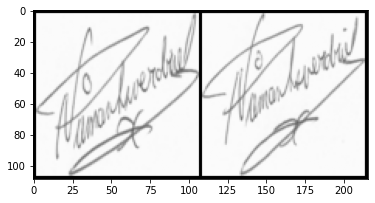

Predicted Eucledian Distance:  0.38268646597862244
Actual Label:  Original Pair Of Signature


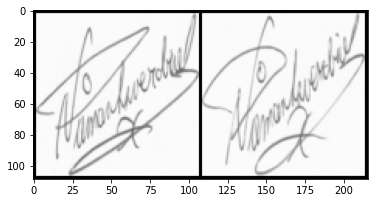

Predicted Eucledian Distance:  0.5995146632194519
Actual Label:  Original Pair Of Signature


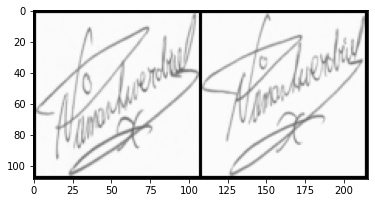

Predicted Eucledian Distance:  0.017002027481794357
Actual Label:  Original Pair Of Signature


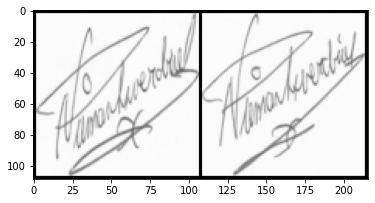

Predicted Eucledian Distance:  0.6386945247650146
Actual Label:  Original Pair Of Signature


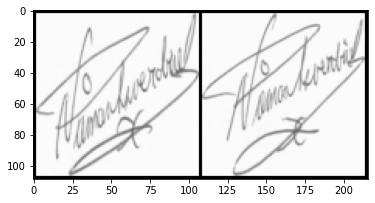

Predicted Eucledian Distance:  0.37307053804397583
Actual Label:  Original Pair Of Signature


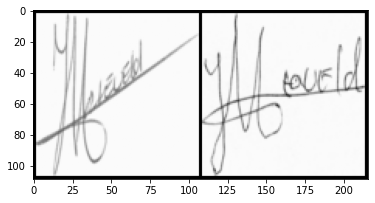

Predicted Eucledian Distance:  0.35365167260169983
Actual Label:  Forged Pair Of Signature


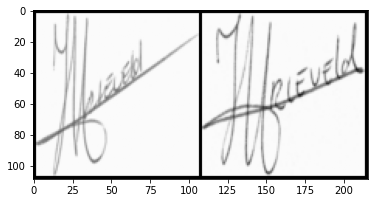

Predicted Eucledian Distance:  0.3982994854450226
Actual Label:  Forged Pair Of Signature


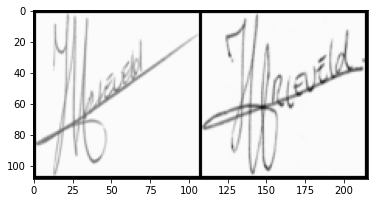

Predicted Eucledian Distance:  0.34710991382598877
Actual Label:  Forged Pair Of Signature


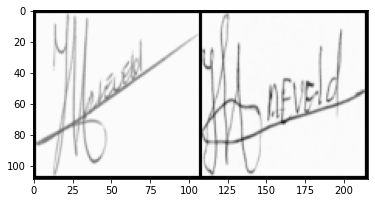

Predicted Eucledian Distance:  0.6987292766571045
Actual Label:  Forged Pair Of Signature


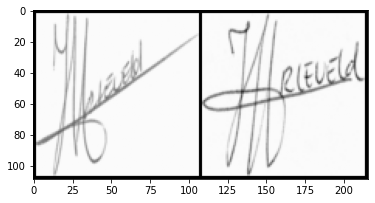

Predicted Eucledian Distance:  0.5992202758789062
Actual Label:  Forged Pair Of Signature


In [ ]:

count=0
for i, data in enumerate(test_dl,0):
    if count >= 822:
        x0, x1 , label = data
        concat = torch.cat((x0,x1),0)
        output1,output2 = model(x0.to(device),x1.to(device))

        eucledian_distance = F.pairwise_distance(output1, output2)

        if label==torch.FloatTensor([[0]]):
            label="Original Pair Of Signature"
        else:
            label="Forged Pair Of Signature"

        plt.imshow(torchvision.utils.make_grid(concat).permute(1, 2, 0))
        plt.show()
        print("Predicted Eucledian Distance: ",eucledian_distance.item())
        print("Actual Label: ",label)
    count=count+1
    if count >= 832:
        break

<div align="justify">

**Sugerencia de posibles mejoras y enfoques alternativos**

Si bien el uso de Mínimos Cuadrados para la verificación de firmas ofrece una aproximación sólida, se pueden considerar varias mejoras y enfoques alternativos:

- **Aumento de datos:** A medida que los modelos de redes neuronales se entrenan con más variabilidad en los datos, el ajuste y la robustez mejoran significativamente. Técnicas como la rotación, la distorsión y el cambio de escala pueden generar más datos de entrenamiento para manejar mejor las variaciones en las firmas.

- **Redes neuronales profundas (Deep Learning):** Aunque las redes siamesas ofrecen una estructura efectiva para comparar pares de firmas, el uso de modelos más complejos como redes neuronales convolucionales (CNN) o arquitecturas de redes neuronales recurrentes (RNN) podría mejorar la extracción de características, especialmente para firmas con alta variabilidad o estilos de escritura complejos.

- **Técnicas de Regularización:** Para evitar el sobreajuste (overfitting), que puede ocurrir cuando el modelo es entrenado en un conjunto de datos limitado, se pueden incorporar técnicas de regularización como Dropout, L2 regularization o Data Augmentation.


- **Enfoques alternativos:** En lugar de usar Mínimos Cuadrados, se podrían explorar otras funciones de pérdida, como la pérdida de contraste o la pérdida de tripletas, que podrían ser más adecuadas para la comparación de firmas, especialmente cuando se busca una mayor distancia entre las firmas genuinas y falsas.

</div>

# **🧠Anàlisis de resultados💡**

<div align="justify">

**Interpretaciòn de los resultados del modelo de Mínimos Cuadrados**

El modelo de Mínimos Cuadrados utilizado en este proyecto tiene como objetivo minimizar la diferencia cuadrada entre las representaciones de firmas auténticas, extrayendo características discriminativas entre las firmas comparadas. Al calcular la **diferencia cuadrada** entre las representaciones de las dos firmas de entrada $(output1$ y $output2)$, la función de pérdida, $ContrastiveLoss$, penaliza las diferencias grandes entre firmas genuinas mientras que no afecta las diferencias cuando las firmas son forjadas. Esta estrategia está diseñada para fomentar la compactación de las representaciones de firmas genuinas y aumentar la distancia entre las representaciones de firmas forjadas.

**El objetivo final del modelo es que, para las parejas de firmas genuinas (etiquetadas con 1), la distancia cuadrada entre las representaciones sea lo más pequeña posible, mientras que para las parejas de firmas falsas (etiquetadas con 0), la distancia no debería contribuir al error**.

**⚠️Los resultados del modelo pueden interpretarse en términos de la reducción en el valor de la pérdida a lo largo de las iteraciones de entrenamiento, lo cual indica que el modelo está aprendiendo a distinguir correctamente entre firmas genuinas y falsificadas.⚠️**

La implementación de mínimos cuadrados muestra características importantes:

1. **Sensibilidad a Variaciones:**

    - Captura efectivamente diferentes grados de similitud
    - Proporciona una métrica continua de similitud
    - Mantiene consistencia en las predicciones

2. **Escala de Distancias:**

    - Rango de valores interpretable (0 a 1)
    - Correlación clara entre distancia y similitud
    - Umbral natural para clasificación
</div>

<center>

<div align="justify">

**Discutir la calidad del ajuste y las limitaciones del método en tu aplicación específica**

La calidad del ajuste de este modelo depende de varios factores. El método de Mínimos Cuadrados es eficaz en escenarios donde las relaciones entre las características de las firmas se pueden modelar de manera lineal o donde las diferencias entre clases (genuinas vs. falsas) no son extremadamente complejas. Sin embargo, hay varios aspectos a considerar:

- **Calidad del ajuste:** Si el modelo ha sido entrenado adecuadamente y el valor de la pérdida se ha reducido significativamente a lo largo del entrenamiento, podemos suponer que el modelo está aprendiendo una buena representación de las firmas. Un valor bajo de la pérdida generalmente indica que el modelo está ajustando bien las representaciones. Sin embargo, este ajuste puede no ser perfecto si los datos de entrada tienen ruidos o inconsistencias, como firmas mal escaneadas o variaciones extremas en la escritura.

- **Limitaciones:** A pesar de sus ventajas, el método de Mínimos Cuadrados presenta algunas limitaciones. En aplicaciones de verificación de firmas manuscritas, las variaciones naturales en la forma de firmar pueden generar errores en la comparación. Este modelo no captura de manera eficiente las complejidades de las firmas en ciertos casos, como las firmas que han sido realizadas bajo diferentes condiciones físicas o emocionales. Además, el método no tiene en cuenta las posibles transformaciones geométricas (como rotación o escala) que pueden ocurrir en las imágenes de las firmas.

</div>

<center>